<center>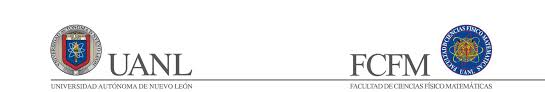  </center>


<h1>  <center>  Aprendizaje Automatizado   </center>    <h1> 

<t1>    <center>    <b> Practica 4: Modelo de Agrupamiento (Renta de bicicletas (SEUL) </center>  </t1>

<t1>   <center>   
   <b>   Nombre  </b>    Cynthia  Selene Martínez Espinoza <b>  Matricula   </b> 1011238                            
</center>   </t1>

<h2> Cargar librerias.</h2>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,   cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, homogeneity_score, completeness_score, v_measure_score, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, mean_squared_error, r2_score, confusion_matrix, roc_curve,  precision_recall_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

<h2> Cargar y preprocesar el conjunto de datos. </h2>

In [2]:
# Leer los datos de archivo csv, typed_uanl.csv con el URL
url = "C:/Users/PC/Documents/GitHub/GitFlow-en-Github/ML003/Practica 4/Practica/RentasBicicletasSEUL.csv"
df = pd.read_csv(url)

In [3]:
# Mostrar las primeras filas del DataFrame
print(df.head())

         Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   


<h2> Determinar el número óptimo de clusters 𝑘 utilizando el método del codo. </h2>

In [4]:
# Preprocesar los datos: convertir columnas categóricas a numéricas y manejar valores faltantes si los hay
df['Seasons'] = df['Seasons'].astype('category').cat.codes
df['Holiday'] = df['Holiday'].astype('category').cat.codes
df['Functioning Day'] = df['Functioning Day'].astype('category').cat.codes

# Crear una variable binaria de clasificación basada en un umbral de renta de bicicletas
limite = df['Rented Bike Count'].median()
df['High Demand'] = (df['Rented Bike Count'] > limite).astype(int)

# Selección de características y variable objetivo
funciones = [
    'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 
    'Visibility (10m)', 'Dew point temperature(°C)', 
    'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 
    'Seasons', 'Holiday', 'Functioning Day'
]
X = df[funciones]
y = df['High Demand']

# Normalizar las características
normalizados = StandardScaler()
X_normalizados = normalizados.fit_transform(X)

# Dividir en conjunto de entrenamiento y prueba
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(X_normalizados, y, test_size=0.2, random_state=42)

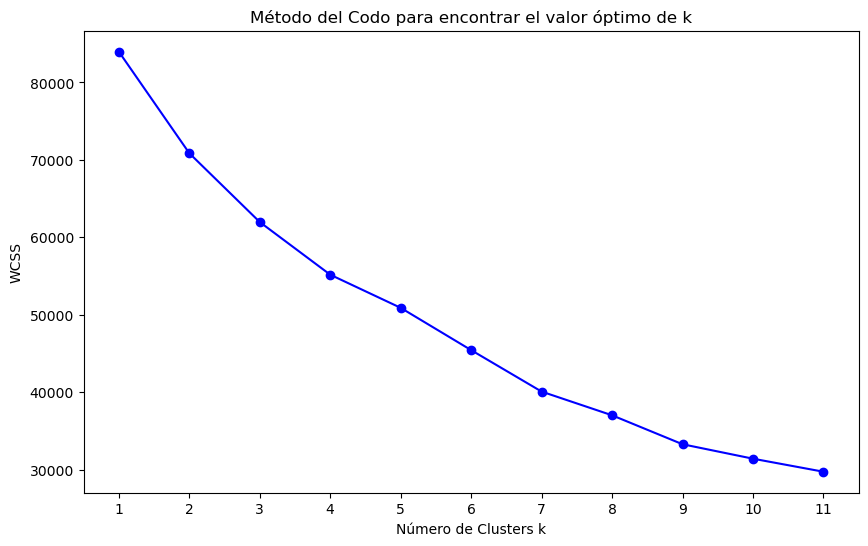

In [5]:
# Método del codo para encontrar el número óptimo de clusters
wcss = []
k_valores = range(1, 12)
for k in k_valores:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_entrenamiento)
    wcss.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(10, 6))
plt.plot(k_valores, wcss, 'bo-')
plt.xticks(k_valores)  # Asegurarse de que todos los valores de k se imprimen en el eje X
plt.xlabel('Número de Clusters k')
plt.ylabel('WCSS')
plt.title('Método del Codo para encontrar el valor óptimo de k')
plt.savefig("C:/Users/PC/Documents/GitHub/GitFlow-en-Github/ML003/Practica 4/Practica/GraficaClusterCodo.png")
plt.show()
plt.close()

<h2> Entrenar el modelo K-means con el número óptimo de clusters. </h2>

In [6]:
# Seleccionar el valor óptimo de k basado en el gráfico del método del codo
clusteroptimoK = 3  # Ajusta este valor según el gráfico

# Entrenar el modelo K-means
kmeans = KMeans(n_clusters=clusteroptimoK, random_state=42, n_init=10)
kmeans.fit(X_entrenamiento)

# Asignar los clusters a los datos de prueba
y_kmeans = kmeans.predict(X_prueba)


<h2> Comparar los Resultados del Modelo K-means con el Modelo de Clasificación</h2>

In [14]:
# Comparar los clusters con las etiquetas de alta demanda
comparar_df = pd.DataFrame({'Cluster': y_kmeans, 'High Demand': y_prueba})

In [15]:
# Verificar los tipos de datos
print(comparar_df.dtypes)

# Convertir las columnas a tipo categórico
#comparar_df['Cluster'] = comparar_df['Cluster'].astype('category')
#comparar_df['High Demand'] = comparar_df['High Demand'].astype('category')

comparar_df['Cluster'] = comparar_df['Cluster'].astype(str)
comparar_df['High Demand'] = comparar_df['High Demand'].astype(str)

# Verificar los tipos de datos después de la conversión
print(comparar_df.dtypes)

Cluster        int32
High Demand    int32
dtype: object
Cluster        object
High Demand    object
dtype: object


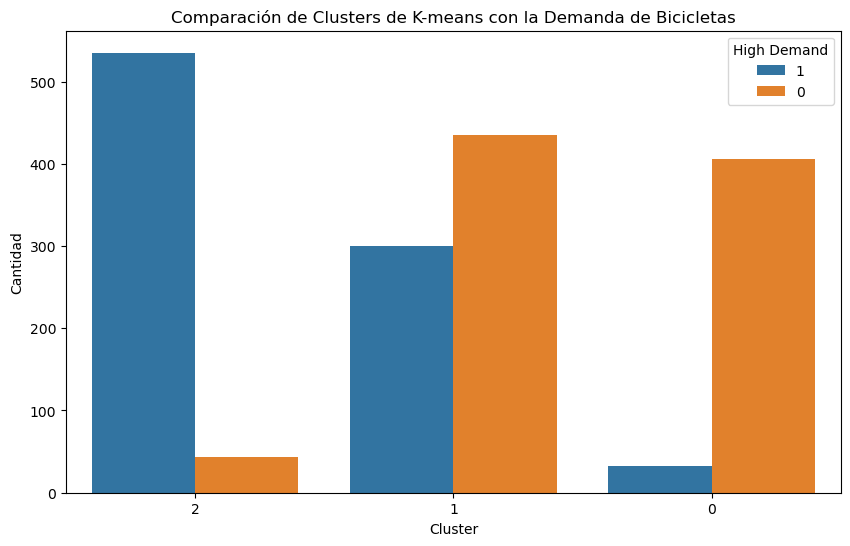

In [16]:
# Graficar la comparación
plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', hue='High Demand', data=comparar_df)
plt.xlabel('Cluster')
plt.ylabel('Cantidad')
plt.title('Comparación de Clusters de K-means con la Demanda de Bicicletas')
plt.savefig("C:/Users/PC/Documents/GitHub/GitFlow-en-Github/ML003/Practica 4/Practica/GraficaComparacon.png")
plt.show()

In [9]:

# Evaluar la calidad del agrupamiento
ari = adjusted_rand_score(y_prueba, y_kmeans)
homogeneity = homogeneity_score(y_prueba, y_kmeans)
completeness = completeness_score(y_prueba, y_kmeans)
v_measure = v_measure_score(y_prueba, y_kmeans)

# Mostrar resultados
print(f"Adjusted Rand Index: {ari:.4f}")
print(f"Homogeneity: {homogeneity:.4f}")
print(f"Completeness: {completeness:.4f}")
print(f"V-measure: {v_measure:.4f}")

Adjusted Rand Index: 0.2595
Homogeneity: 0.3682
Completeness: 0.2370
V-measure: 0.2884


<h2> Grafica</h2>

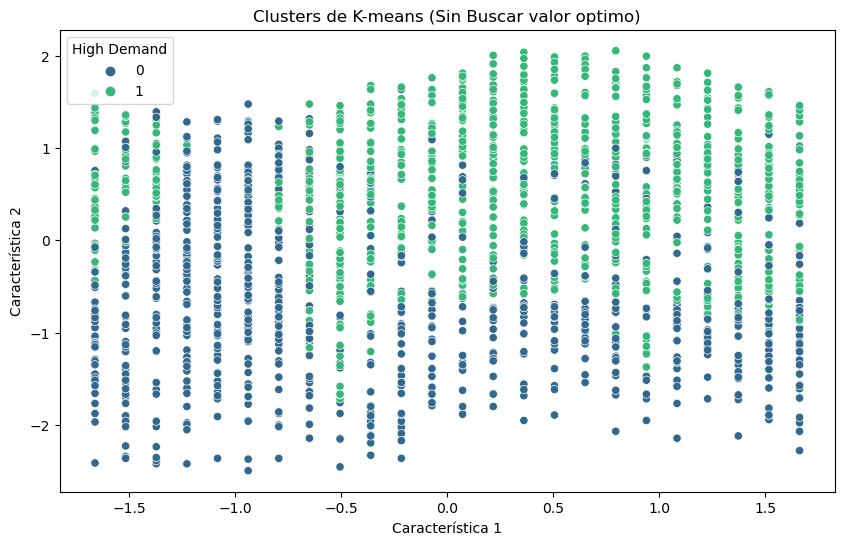

In [10]:
# Graficar los clusters obtenidos con K-means
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_prueba[:, 0], y=X_prueba[:, 1], hue=y_prueba, palette='viridis')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('Clusters de K-means (Sin Buscar valor optimo)')
plt.savefig("C:/Users/PC/Documents/GitHub/GitFlow-en-Github/ML003/Practica 4/Practica/GraficaClusterAltademanda.png")
plt.show()

In [ ]:
# variables  relevantes para la clusterizacion Renta de bicicletas
# "Hour", "Temperature(°C)", "Humidity(%)",

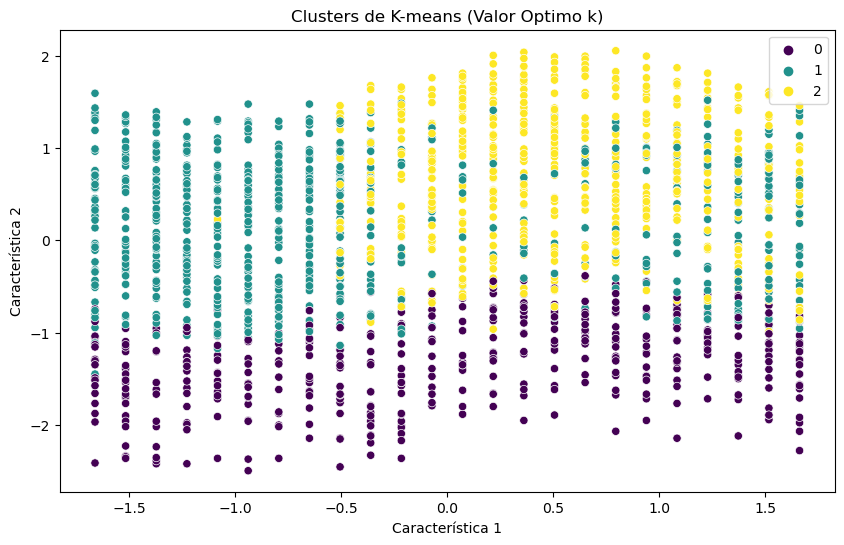

In [11]:
# Visualizar los clusters

# Graficar los clusters obtenidos con K-means
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_prueba[:, 0], y=X_prueba[:, 1], hue=y_kmeans, palette='viridis')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('Clusters de K-means (Valor Optimo k)')
plt.savefig("C:/Users/PC/Documents/GitHub/GitFlow-en-Github/ML003/Practica 4/Practica/GraficaClusterOptimo.png")
plt.show()

<h2> Analisis de resultados </h2>

 <t2>   

El modelo K-means con 𝑘=3 muestra una correspondencia moderada con las etiquetas de alta demanda, pero sus métricas de evaluación indican que hay mezcla de clases dentro de los clusters y que los datos de una misma clase están dispersos en varios clusters.

El modelo K-means con 𝑘 = 3 proporciona una visión agrupada de los datos, sus métricas de evaluación sugieren que no es tan eficaz para capturar la estructura de la demanda de bicicletas en comparación con el modelo de clasificación.

 El modelo K-means puede ser útil para análisis exploratorio y para identificar patrones generales en los datos, pero no es la mejor opción para predicciones precisas de demanda.
    
</t2>